<a href="https://colab.research.google.com/github/Stefano0210/IULM_DDM2324_Notebooks/blob/main/20_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulazione Monte Carlo per un centro estetico

Cominciamo l'esercizio simulando il calcolo per un singolo utente

In [52]:
import random

random.seed(42) # impostiamo il "seed" del generatore di numeri casuali (RNG) per la riproducibilità dei risultati

def simulate_iteration():
    # Costi e ricavi fissi
    costo_trattamento = 50
    offerta_groupon = 20
    ricavo_da_vendita = offerta_groupon / 2
    costo_fisso_e_variabile = costo_trattamento * 0.5

    # Generazione dei valori stocastici con i nuovi intervalli
    probabilita_nuovi_clienti = random.uniform(0.65, 0.85) 
    probabilita_clienti_spendano_di_piu = random.uniform(0.30, 0.42)
    importo_extra = random.uniform(10, 50)
    probabilita_che_clienti_ritornino = random.uniform(0.10, 0.30)
    profitto_annuo_per_cliente = random.uniform(50, 250)
    retention_rate = random.uniform(0.55, 0.85)
    discount_rate = 0.1

    # Guadagno iniziale per cliente acquisito con Groupon
    guadagno_totale_per_cliente = ricavo_da_vendita + probabilita_clienti_spendano_di_piu * importo_extra - costo_fisso_e_variabile

    # Calcolo del guadagno a lungo termine dai clienti nuovi e che tornano (CLV)
    guadagno_da_clienti_che_ritornano = probabilita_nuovi_clienti * probabilita_che_clienti_ritornino * profitto_annuo_per_cliente * (retention_rate / (1 + discount_rate - retention_rate))

    # Guadagno totale
    guadagno_totale = guadagno_totale_per_cliente + guadagno_da_clienti_che_ritornano

    return guadagno_totale



Vediamo alcune simulazioni

In [53]:
for x in range(1,11):
  risultato = simulate_iteration()
  print(f"Risultato {x}: {risultato}")

Risultato 1: 39.53690182741092
Risultato 2: 7.832764589085521
Risultato 3: 21.749711155420865
Risultato 4: 24.925930691318122
Risultato 5: 33.35393037833649
Risultato 6: 53.136435595161444
Risultato 7: 36.924232838155206
Risultato 8: -0.8699868972288449
Risultato 9: 28.75129303671516
Risultato 10: 15.401683880461135


In [54]:
# Eseguiamo la simulazione Monte Carlo per 10.000 iterazioni
numero_iterazioni = 10000
risultati = [simulate_iteration() for _ in range(numero_iterazioni)]

# Calcoliamo alcune statistiche di base sui risultati
media_guadagno = sum(risultati) / numero_iterazioni
percentile_25 = sorted(risultati)[int(0.25 * numero_iterazioni)]
percentile_50 = sorted(risultati)[int(0.50 * numero_iterazioni)]
percentile_75 = sorted(risultati)[int(0.75 * numero_iterazioni)]

media_guadagno, percentile_25, percentile_50, percentile_75

(38.42828631826685, 18.352791243256668, 32.08879137694793, 51.383587620768616)

# Distribuzione dei guadagni per cliente acquisito tramite Groupon

*   List item
*   List item



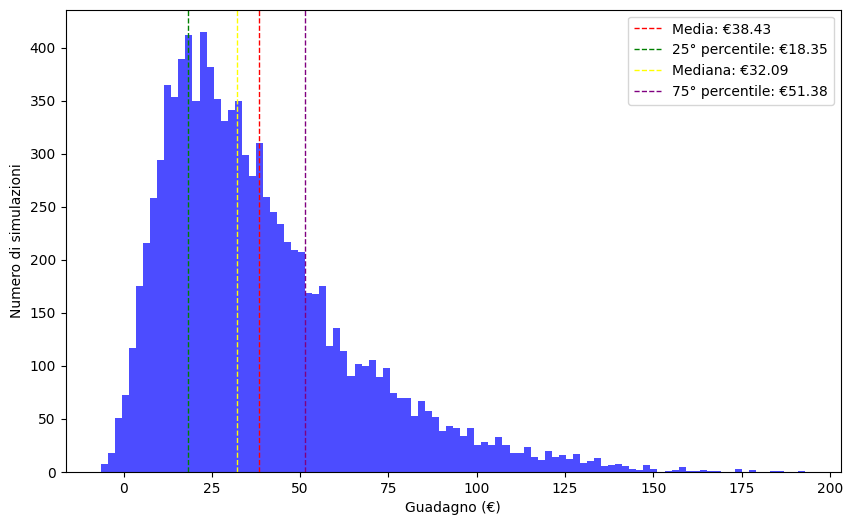

In [55]:
import matplotlib.pyplot as plt

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(risultati, bins=100, color='blue', alpha=0.7)
plt.xlabel('Guadagno (€)')
plt.ylabel('Numero di simulazioni')
plt.grid(False)
plt.axvline(media_guadagno, color='red', linestyle='dashed', linewidth=1, label=f'Media: €{media_guadagno:.2f}')
plt.axvline(percentile_25, color='green', linestyle='dashed', linewidth=1, label=f'25° percentile: €{percentile_25:.2f}')
plt.axvline(percentile_50, color='yellow', linestyle='dashed', linewidth=1, label=f'Mediana: €{percentile_50:.2f}')
plt.axvline(percentile_75, color='purple', linestyle='dashed', linewidth=1, label=f'75° percentile: €{percentile_75:.2f}')
plt.legend()
plt.show()


# Probabilitá di superare il break even

In [56]:
# Calcolo della probabilità che la prima versione di parametri dia un guadagno superiore a 0
probabilita_guadagno_superiore_0 = sum(1 for risultato in risultati if risultato > 0) / numero_iterazioni
print(probabilita_guadagno_superiore_0)


0.9912
